In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#loading the data
data=pd.read_csv('/content/bank.csv')

In [4]:
#converting data to dataframe
df=pd.DataFrame(data)

In [5]:
#displaying the dataframe first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [7]:
#shape of data
df.shape

(10861, 17)

In [8]:
#statistical description of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


# **Checking for null values**

In [10]:
df.isna().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [11]:
df['job'].unique()


array(['admin.', 'technician', 'services', 'management', 'retired',
       'unemployed', 'blue-collar', 'entrepreneur', 'housemaid',
       'self-employed', 'unknown', nan, 'student'], dtype=object)

In [12]:
#filling null values in job column
df['job'].fillna(df['job'].mode()[0],inplace=True)

In [13]:
df['education'].unique()

array(['secondary', 'tertiary', 'unknown', nan, 'primary'], dtype=object)

In [14]:
#filling null values in education column
df['education'].fillna(df['education'].mode()[0],inplace=True)

<Axes: >

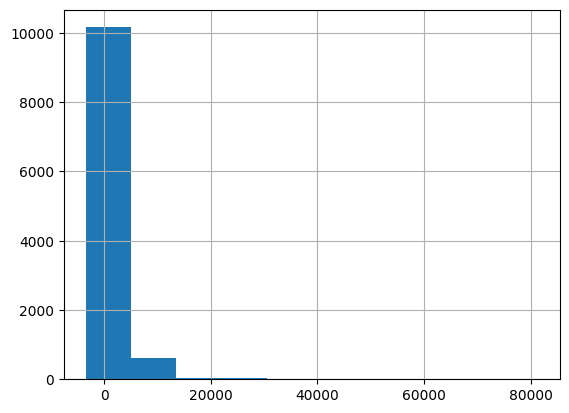

In [15]:
#histogram plotting for balance
df['balance'].hist()

In [16]:
#filling balance using median
df['balance'].fillna(df['balance'].median(),inplace=True)

In [17]:
#filling loan contact and day column using mode
df['loan'].fillna(df['loan'].mode()[0],inplace=True)
df['contact'].fillna(df['contact'].mode()[0],inplace=True)
df['day'].fillna(df['day'].mode()[0],inplace=True)


<Axes: >

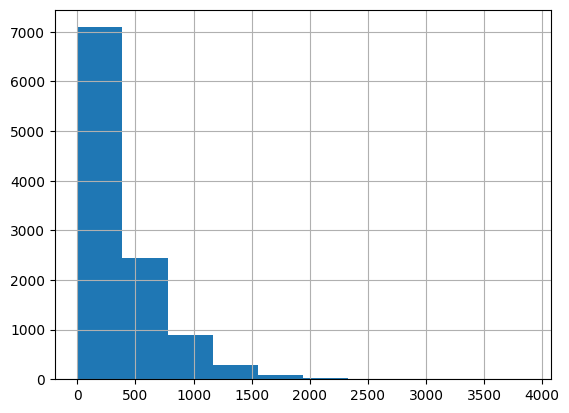

In [18]:
df['duration'].hist()

In [19]:
df['duration'].fillna(df['duration'].median(),inplace=True)

In [24]:
df['pdays'].fillna(df['pdays'].mean(),inplace=True)

In [25]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# **Encoding**

In [26]:
#splitting data as numerical and categorical columns
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(exclude=np.number).columns

In [27]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [28]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [30]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder
#label encoding cat_cols
lb_enc=LabelEncoder()
for col in cat_cols:
    df[col] = lb_enc.fit_transform(df[col])

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1
4,54,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3,1


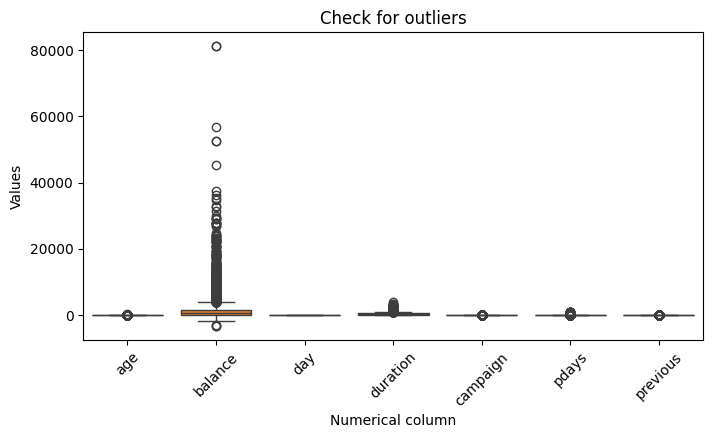

In [32]:
#checking for outliers in numerical columns
plt.figure(figsize=(8,4))
sns.boxplot(data=df[num_cols])
plt.title('Check for outliers')
plt.xlabel('Numerical column')
plt.xticks(rotation=45,fontsize=10)
plt.ylabel('Values')
plt.show()

In [33]:
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000
mean,40.323727,1457.230642,17.887671,386.049903,2.442593,33.002859,0.569929
std,11.969443,3076.703000,7.846003,345.123049,2.662568,89.925801,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,157.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [34]:
#clipping age column
df['age']=df['age'].clip(lower=df['age'].quantile(0.05),upper=df['age'].quantile(0.95))

In [35]:
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000,10861.000000
mean,39.964828,1457.230642,17.887671,386.049903,2.442593,33.002859,0.569929
std,10.283865,3076.703000,7.846003,345.123049,2.662568,89.925801,1.875257
min,26.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,157.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,60.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [36]:
df['campaign'].nunique()

36

In [37]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6, 32,  8, 11,  7,  9, 10, 15, 12, 14, 17, 13,
       24, 29, 16, 21, 20, 19, 18, 22, 25, 43, 51, 63, 41, 26, 28, 55, 50,
       38, 23])

In [38]:
df['pdays'].nunique()

424

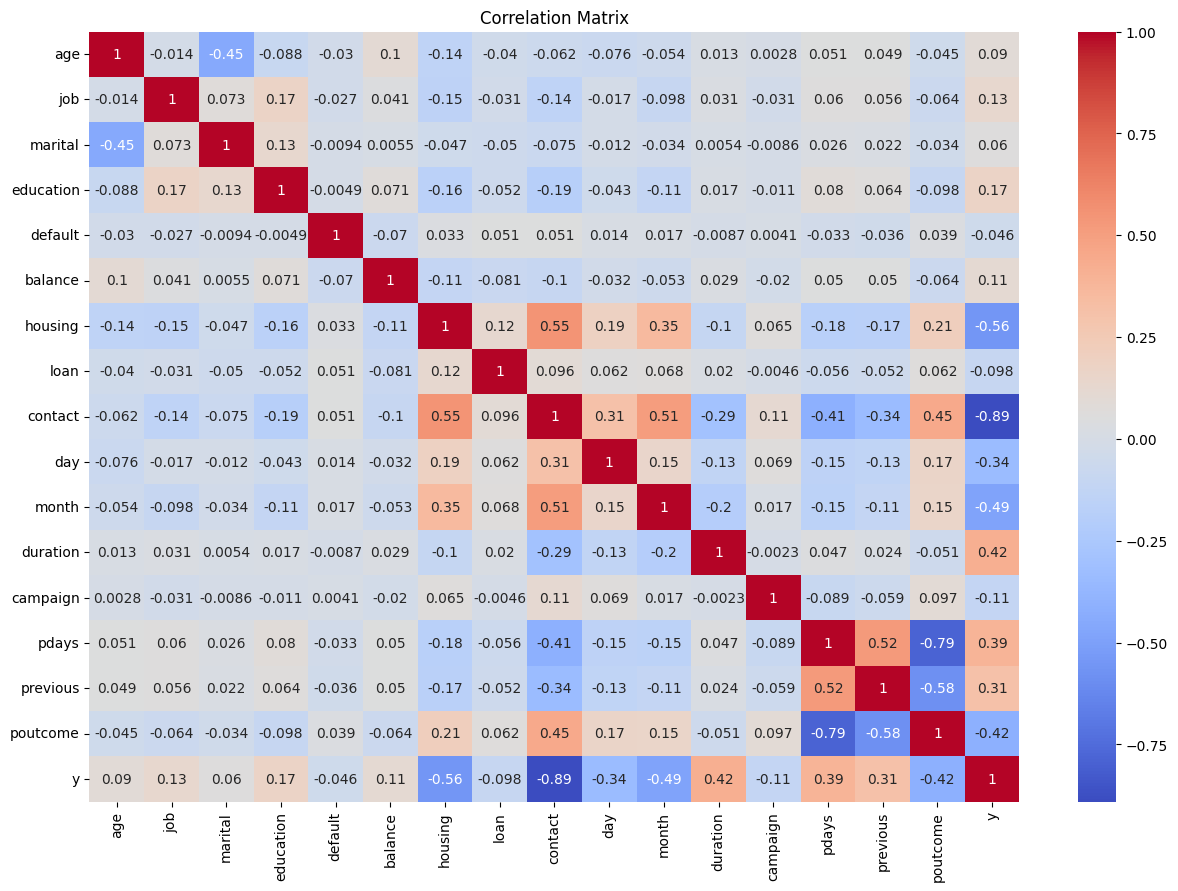

In [41]:
#identifying correlation matrix for dataset
corr_matrix=df.corr()
#heatmap of correelation
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# values positively correlated to target variable are
# age,job,marital,education,balance,duration,pdays,previous

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1
4,54,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3,1


In [152]:
#scaling num_cols using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_cols_scale=['age','balance','duration','campaign','pdays','previous']
df[num_cols_scale]=sc.fit_transform(df[num_cols_scale])

In [105]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.851060,0,1,1,0,0.287909,1,0,2,-1.642654,8,1.900714,-0.541830,-0.378139,-0.303935,3,1
1,1.559327,0,1,1,0,-0.459029,0,0,2,-1.642654,8,3.132216,-0.541830,-0.378139,-0.303935,3,1
2,0.100664,9,1,1,0,-0.060857,1,0,2,-1.642654,8,2.906199,-0.541830,-0.378139,-0.303935,3,1
3,1.462083,7,1,1,0,0.331139,1,0,2,-1.642654,8,0.559102,-0.541830,-0.378139,-0.303935,3,1
4,1.364839,0,1,2,0,-0.413849,0,0,2,-1.642654,8,0.831481,-0.166235,-0.378139,-0.303935,3,1


In [106]:
cols=['age','job','marital','education','default','balance','duration','campaign','pdays','previous']

In [107]:
#spliting data for training and testing
X=df[cols]
y=df['y']

In [108]:
#performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [109]:
X1=df[cols]
y1=df['y']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [110]:
#perform logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X1_train,y1_train)
y1_pred=lr.predict(X1_test)
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y1_pred)

0.8173032673722964

In [111]:
#modeling using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.834790612057064

In [112]:
#mean squared error test
mse=mean_squared_error(y_test,y_pred)
mse

0.16520938794293602

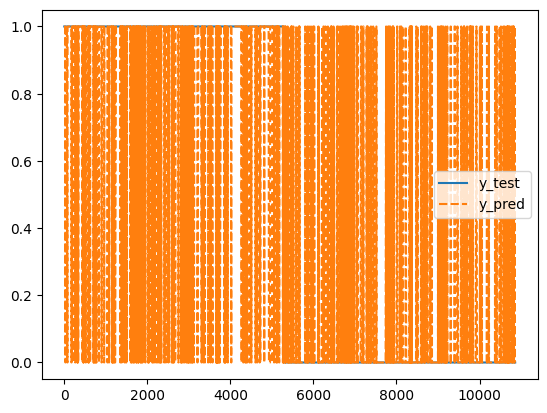

In [113]:
df_1=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
sns.lineplot(data=df_1)
plt.show()



In [114]:
#exporting pickle file
import pickle
pickle.dump(rf,open('model.pkl','wb'))


In [115]:
pickle.dump(sc,open('sc.pkl','wb'))

In [116]:
#importing pickle file
model=pickle.load(open('model.pkl','rb'))
sc=pickle.load(open('sc.pkl','rb'))

In [117]:
#making prediction using pickle file
predictions = model.predict(X_test.iloc[:3])
actual=y_test.iloc[:3]
print(predictions)
print(actual)


[1 0 0]
33      1
7235    0
8682    0
Name: y, dtype: int64


**hyper parameter tuning**

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [80]:
# Define the preprocessing pipeline
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [81]:
# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [82]:
# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['liblinear', 'lbfgs'],  # Solver algorithms
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [83]:
# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [84]:

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [85]:


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}
Best Cross-Validation Score: 0.98
Test Accuracy: 0.98


# **Predict for new values**

In [87]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [119]:
cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [144]:
vals=[42,2,0,3,1,231,1234,2,1,2]

In [145]:
data=pd.DataFrame([vals],columns=cols)

In [146]:
sc=pickle.load(open('sc.pkl','rb'))

In [149]:
num_cols_scale=['age','balance','duration','campaign','pdays','previous']

In [153]:
data_scale=sc.transform(data[num_cols_scale])

In [154]:
pred=model.predict(data)

In [156]:
if pred[0]==0:
  print('No')
else:
  print('Yes')

Yes
